[*********************100%***********************]  1 of 1 completed


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1826
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3068.676
Date:                Tue, 21 Jan 2025   AIC                           6149.351
Time:                        11:29:49   BIC                           6182.407
Sample:                    01-02-2020   HQIC                          6161.545
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0936      0.025     -3.702      0.000      -0.143      -0.044
ar.L2         -0.0885      0.034     -2.592      0.010      -0.155      -0.022
ar.L3          0.0209      0.042      0.501      0.6

<Figure size 640x480 with 0 Axes>

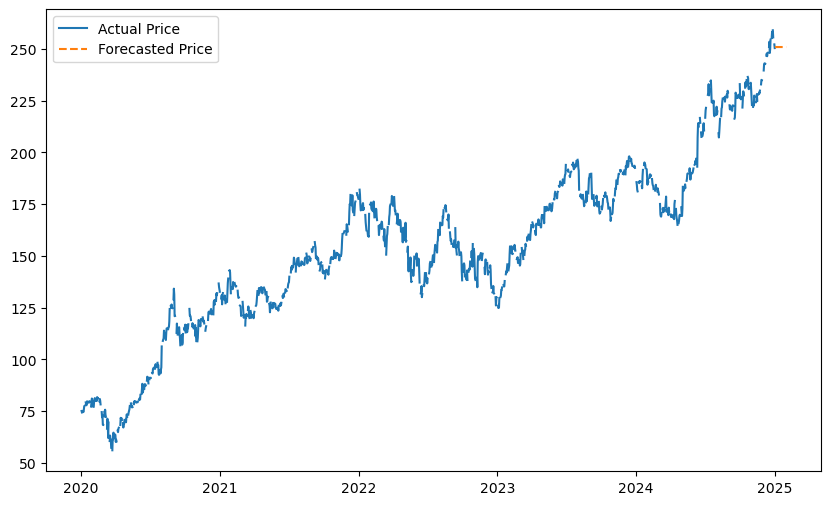

In [15]:
#Simple code to use Statsmodels ARIMA to forecast AAPL price

import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2025-01-01')


data = stock_data['Close']
data.index = pd.to_datetime(data.index)

data = data.dropna()


data = data.asfreq('D')  # Set frequency to daily


# Fit the ARIMA model
model = sm.tsa.ARIMA(data, order=(5, 1, 0))  # Order=(p, d, q)
results = model.fit()

print(results.summary())


# Forecast future prices
forecast = results.get_forecast(steps=30)  # Forecasting 30 days into the future
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)


combined_data = pd.concat([data, forecast_df], axis=1)

print(forecast_df.head())

plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual Price')  # Use the original data for 'Actual Price'
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Price', linestyle='--')  # Use forecast_df for 'Forecasted Price'
plt.legend()
plt.show()
